# Загрузка необходимых библиотек и определение констант

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [10]:
DATASET_PATH = "data/credit_scoring.csv"

# Исследование данных

In [11]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

In [12]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.977899,63.0,0,517.000000,NaN,5,0,1,0.0,A,d
149996,0,0.025449,58.0,0,0.253855,15500.0,7,0,0,2.0,A,d
149997,0,0.058001,83.0,0,0.013997,5000.0,6,0,0,0.0,A,e
149998,0,0.071273,42.0,0,0.008638,6945.0,3,0,0,1.0,A,c


## Кредитный скоринг
Датасет содержит информацию о клиентах некоторого банка.  
Ваша задача состоит в том, чтобы по различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку 90 и более дней или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет).

_Целевая переменная_ (таргет) – `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

### Признаки
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `NumberRealEstateLoansOrLines`: количество кредиов (в том числе под залог жилья)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

In [13]:
df.shape

(150000, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [15]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,135155.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.293618,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222
std,0.249746,249.755371,14.772577,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


## Обработка пропущенных значений

В наших данных есть пропуски в столбцах age, MonthlyIncome и NumberOfDependents.

В контексте кредитного скоринга, пропущенные значения могут быть важными для оценки платежеспособности клиента. Вместо удаления строк с пропущенными значениями мы заменим их на медиану по столбцу. Среднее значение более чувствительно к выбросам, поэтому выбрали медиану.

In [16]:
df['age'].fillna(df['age'].median(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

In [17]:
df.isnull().describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
count,150000,150000,150000,150000,150000,150000,150000,150000,150000,150000,150000,150000
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,150000,150000,150000,150000,150000,150000,150000,150000,150000,150000,150000,150000


## Преобразование категориальных признаков

Нам необходимо конвертировать категориальные характеристики в численные, так как большинство моделей машинного обучения не может работать с текстовыми данными как входными.

In [18]:
one_hot_encoded = pd.get_dummies(df['RealEstateLoansOrLines'])
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('RealEstateLoansOrLines', axis=1, inplace=True)

one_hot_encoded = pd.get_dummies(df['GroupAge'])
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('GroupAge', axis=1, inplace=True)

df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,A,B,C,D,E,a,b,c,d,e
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,1,0,0,0,0,0,0,1,0,0
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,1,0,0,0,0,0,1,0,0,0
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,1,0,0,0,0,0,0,1,0,0
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,1,0,0,0,0,0,1,0,0,0
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.977899,63.0,0,517.000000,5400.0,5,0,1,0.0,1,0,0,0,0,0,0,0,1,0
149996,0,0.025449,58.0,0,0.253855,15500.0,7,0,0,2.0,1,0,0,0,0,0,0,0,1,0
149997,0,0.058001,83.0,0,0.013997,5000.0,6,0,0,0.0,1,0,0,0,0,0,0,0,0,1
149998,0,0.071273,42.0,0,0.008638,6945.0,3,0,0,1.0,1,0,0,0,0,0,0,1,0,0


## Отбор признаков

<Axes: >

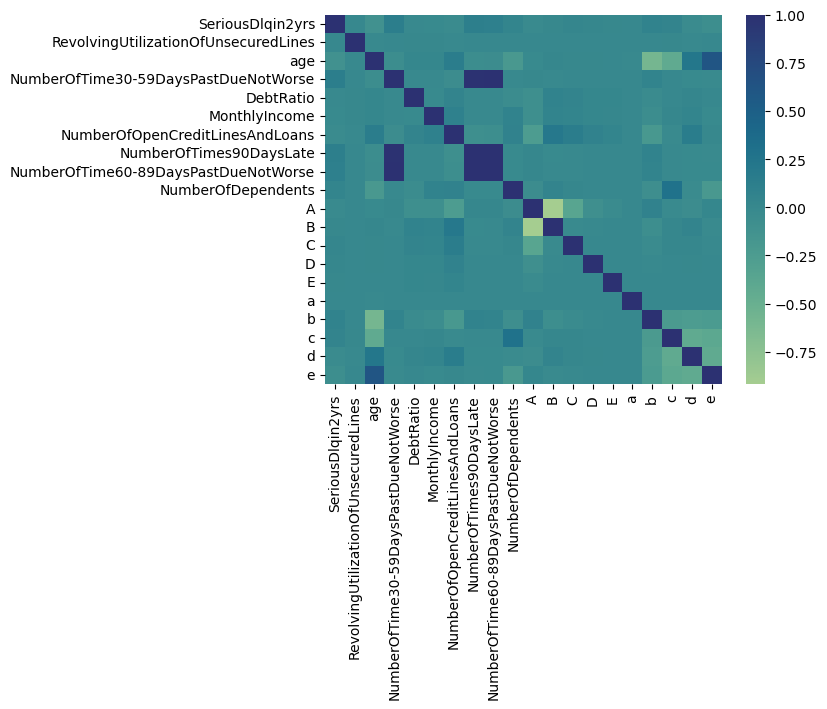

In [19]:
corr = df.corr()

sns.heatmap(corr, cmap="crest")

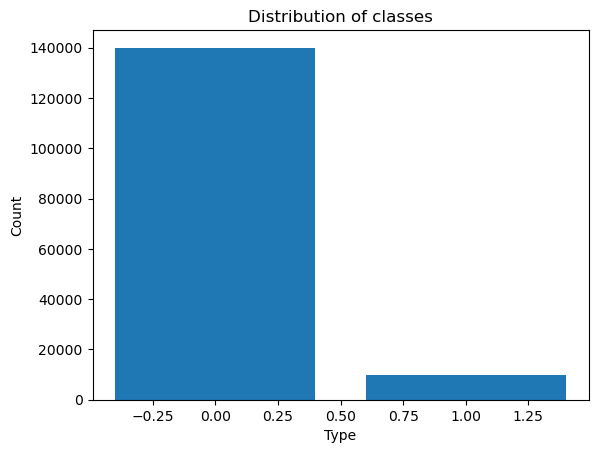

In [20]:
# Проверим данные на дисбаланс классов
value_counts = df['SeriousDlqin2yrs'].value_counts()

plt.bar(value_counts.index, value_counts.values)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Distribution of classes")

plt.show()

Обнаружили дисбаланс классов. Устраним его с помощью метода сэмплирования. Увеличиваем количество примеров миноритарного класса путем создания дубликатов мажоритарного (oversampling).

In [21]:
class_counts = df['SeriousDlqin2yrs'].value_counts()

majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

df_majority = df[df['SeriousDlqin2yrs'] == majority_class]

df_minority = df[df['SeriousDlqin2yrs'] == minority_class]

df_minority_duplicates = pd.concat([df_minority] * (class_counts[majority_class] // class_counts[minority_class]), ignore_index=True)

df = pd.concat([df_majority, df_minority_duplicates], ignore_index=True)

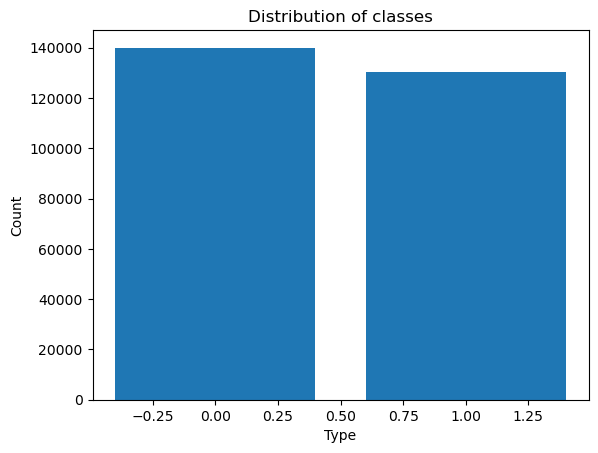

In [22]:
# Снова проверим данные на дисбаланс классов
value_counts = df['SeriousDlqin2yrs'].value_counts()

plt.bar(value_counts.index, value_counts.values)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Distribution of classes")

plt.show()

Оставим в датасете признаки с наибольшей корреляцией.

In [23]:
X = df[['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'C', 'b', 'c']]

y = df['SeriousDlqin2yrs'] # целевая переменная (target)

# Выбор модели и обучение

Recall показывает, какую долю клиентов с просрочкой на 90 и более дней модель правильно идентифицирует. Более высокое значение Recall означает, что модель лучше определяет клиентов с просрочкой. Нам важно минимизировать ложно отрицательные результаты (когда модель пропускает клиентов с просрочкой), поэтому ориентируемся на Recall.

In [21]:
names = ["Nearest_Neighbors", 
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [22]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = recall_score(y_test, pred)
    scores.append(score)
    del clf
    print(f'{name} - {score}')

Nearest_Neighbors - 0.6086810843740481
Gradient_Boosting - 0.6865062442887603
Decision_Tree - 0.6767895217788608
Extra_Trees - 0.6866280840694486
Random_Forest - 0.6816935729515687
Neural_Net - 0.6307950045689917
AdaBoost - 0.6137374352726165
Naive_Bayes - 0.03767895217788608
QDA - 0.421291501675297
SGD - 0.5190070057873896


In [29]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
3,Extra_Trees,0.686628
1,Gradient_Boosting,0.686506
4,Random_Forest,0.681694
2,Decision_Tree,0.676790
5,Neural_Net,0.630795
6,AdaBoost,0.613737
0,Nearest_Neighbors,0.608681
9,SGD,0.519007
8,QDA,0.421292
7,Naive_Bayes,0.037679


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((202734, 7), (67578, 7))

In [25]:
model = ExtraTreesClassifier(n_estimators=10, min_samples_split=2)

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [26]:
classes = pred > 0.6

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[31508,  3240],
        [  923, 31907]], dtype=int64),
 0.9718854706061529)

# Сохранение модели

In [28]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)